teste de push


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
imp_fert_ncm=pd.read_csv('~/git/BD/temp/imp_fert_ncm_quanti.csv')
map_p=imp_fert_ncm[(imp_fert_ncm.nick=='MAP')&(imp_fert_ncm.km==1)]

In [10]:
mn_poly=pd.read_csv('~/git/BD/temp/mn_poly.csv')

In [18]:
map_p=map_p[['CO_ANO', 'CO_MES', 'CO_NCM', 'nick', 'SG_UF_NCM', 'CO_PAIS', 'CO_URF',\
       'KG_LIQUIDO', 'VL_FOB', 'VL_FRETE', \
       'NO_PAIS', 'km',]]
map_p.rename(columns={'SG_UF_NCM':'UF'},inplace=True)
map_p

,CO_ANO,CO_MES,CO_NCM,nick,UF,CO_PAIS,CO_URF,KG_LIQUIDO,VL_FOB,VL_FRETE,NO_PAIS,km
47678,1997,5,31054000,MAP,SP,628,817800,20000.000000,26624.000000,5000,Reino Unido,1
47722,1997,8,31054000,MAP,AL,676,517600,300000.000000,139800.000000,7200,Rússia,1
47728,1997,8,31054000,MAP,DF,831,915100,207390.000000,87934.000000,4800,Ucrânia,1
47752,1997,8,31054000,MAP,SP,628,817800,20000.000000,26624.000000,5600,Reino Unido,1
47754,1997,9,31054000,MAP,AM,249,915100,207600.000000,83870.000000,8000,Estados Unidos,1
...,...,...,...,...,...,...,...,...,...,...,...,...
61190,2023,7,31054000,MAP,SP,249,817800,12987.471336,9101.000000,895,Estados Unidos,1
61191,2023,9,31054000,MAP,SP,361,817800,8943.246111,6267.000000,3,Índia,1
61192,2024,7,31054000,MAP,RJ,493,717600,5599.248097,3367.000000,298,México,1
61281,2002,8,31054000,MAP,SP,386,817800,1000.000000,297.978943,71,Itália,1


In [54]:
map_p_ba=map_p[map_p.UF=='BA']

In [56]:
mun=pd.read_csv('~/git/BD/Comexstat/tab_complementares/UF_MUN.csv',encoding='Latin-1',sep=';')

In [59]:
mun.columns=['CO_MUN', 'NO_MUN', 'NO_MUN_MIN', 'SG_UF']

In [64]:
map_p_ba_mun=map_p_ba.merge(mn_poly, on=['CO_ANO','CO_MES','CO_PAIS','UF','CO_NCM'], how='left')\
.merge(mun)\
.drop(columns=['km','nick','CO_NCM','CO_PAIS','VL_SEGURO','UF','CO_SH4','NO_MUN_MIN','CO_MUN'])
map_p_ba_mun

,CO_ANO,CO_MES,CO_URF,KG_LIQUIDO_x,VL_FOB_x,VL_FRETE_x,NO_PAIS,KG_LIQUIDO_y,VL_FOB_y,VL_FRETE_y,kg_orig,fob_orig,NO_MUN,SG_UF
0,2000,10,517600,21000.0,15553.0,1401,Itália,21000.0,8321.0,750.0,21000.0,8321.0,JUAZEIRO,BA
1,2001,9,517600,21000.0,14296.0,1774,Israel,21000.0,7887.0,979.0,420000.0,116638.0,JUAZEIRO,BA
2,2003,10,517600,24000.0,19883.0,2260,China,24000.0,11433.0,1300.0,24000.0,11433.0,CANDEIAS,BA
3,2004,5,517600,10500.0,8190.0,656,Israel,10500.0,4805.0,385.0,10500.0,4805.0,JUAZEIRO,BA
4,2005,11,517600,60000.0,60321.0,5453,Rússia,60000.0,37198.0,82563.0,3658775.0,1012401.0,CAMACARI,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2023,2,817800,110000.0,149469.0,11448,China,289200.0,368650.0,566767.0,4665600.0,6073311.0,LUIS EDUARDO MAGALHAES,BA
193,2023,2,817800,110000.0,149469.0,11448,China,4376400.0,5704661.0,566767.0,4665600.0,6073311.0,CANDEIAS,BA
194,2023,9,517800,216000.0,155812.0,27414,China,216000.0,150619.0,26501.0,216000.0,150619.0,CANDEIAS,BA
195,2023,10,517800,120000.0,126241.0,3493,Israel,120000.0,122454.0,3389.0,120000.0,122454.0,JUAZEIRO,BA


In [67]:
d=map_p_ba_mun.groupby(by=['CO_ANO','NO_MUN'])['KG_LIQUIDO_x'].sum().reset_index()

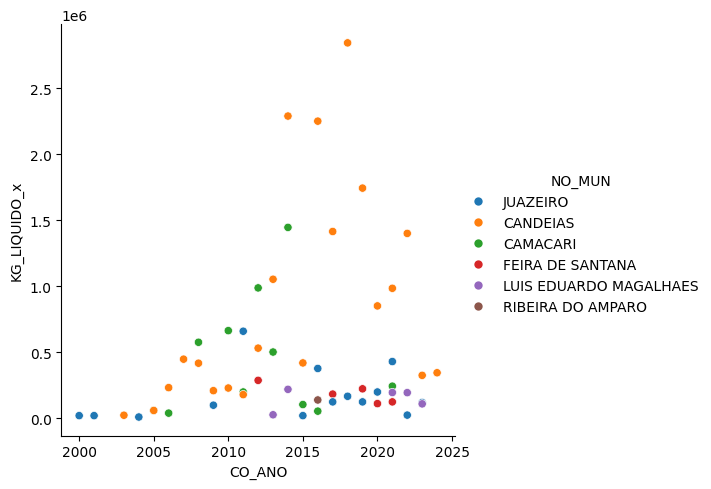

In [69]:
sns.relplot(data=d,x='CO_ANO',y='KG_LIQUIDO_x',hue='NO_MUN')

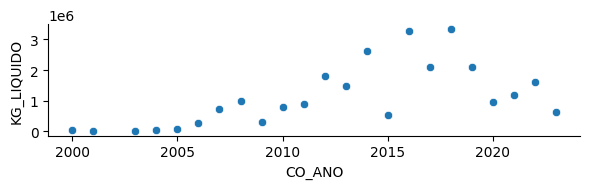

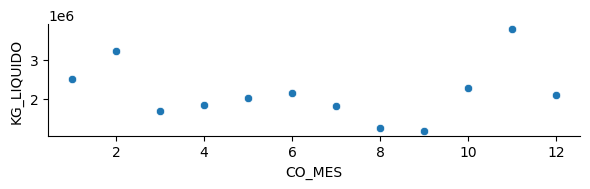

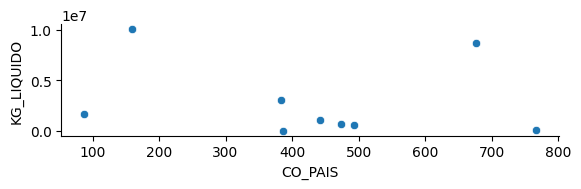

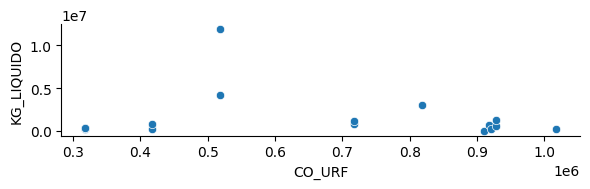

In [27]:
for c in ['CO_ANO','CO_MES','CO_PAIS','CO_URF']:
    d=map_p_ba[map_p_ba.CO_ANO!=2024].groupby(by=[c]).KG_LIQUIDO.sum().reset_index()
    sns.relplot(data=d,x=c,y='KG_LIQUIDO', height=2, aspect=3)
plt.show()